In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Embedding, LSTM, SimpleRNN, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [2]:
# Load dataset
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# Zero padding
max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [4]:
# One hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
# Initialize model
# Calculate mean of hidden state vectors
main_input = Input(shape=(max_len,), dtype='int32')                                      # headline input
x = Embedding(output_dim=64, input_dim=max_features, input_length=max_len)(main_input)  # encode input sequence into sequence of dense 64-dimensional vectors
RNN_out = SimpleRNN(32, return_sequences=True)(x)                                       # transform the vector sequence into a single vector containing information about the entire sequence
out = Lambda(lambda x: tf.math.reduce_mean(x, axis=1))(RNN_out)                         # find mean
x = Dense(16, activation='relu')(out)
main_output = Dense(2, activation='softmax')(x)
model = Model(inputs=main_input, outputs=main_output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 64)           640000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100, 32)           3104      
                                                                 
 lambda_2 (Lambda)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 2)                 34        
                                                                 
Total params: 643666 (2.46 MB)
Trainable params: 643666 (2.46

In [9]:
# Fit the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 53ms/step - loss: 0.6242 - accuracy: 0.6506 - val_loss: 0.4967 - val_accuracy: 0.7620
Epoch 2/10
157/157 [==============================] - 14s 91ms/step - loss: 0.4225 - accuracy: 0.8189 - val_loss: 0.3886 - val_accuracy: 0.8250
Epoch 3/10
157/157 [==============================] - 13s 86ms/step - loss: 0.3248 - accuracy: 0.8675 - val_loss: 0.3718 - val_accuracy: 0.8308
Epoch 4/10
157/157 [==============================] - 13s 81ms/step - loss: 0.2789 - accuracy: 0.8914 - val_loss: 0.3802 - val_accuracy: 0.8282
Epoch 5/10
157/157 [==============================] - 13s 85ms/step - loss: 0.2456 - accuracy: 0.9061 - val_loss: 0.3961 - val_accuracy: 0.8296
Epoch 6/10
157/157 [==============================] - 13s 82ms/step - loss: 0.2185 - accuracy: 0.9182 - val_loss: 0.3820 - val_accuracy: 0.8306
Epoch 7/10
157/157 [==============================] - 12s 78ms/step - loss: 0.1992 - accuracy: 0.9273 - val_loss: 0.4209 - val_accuracy:

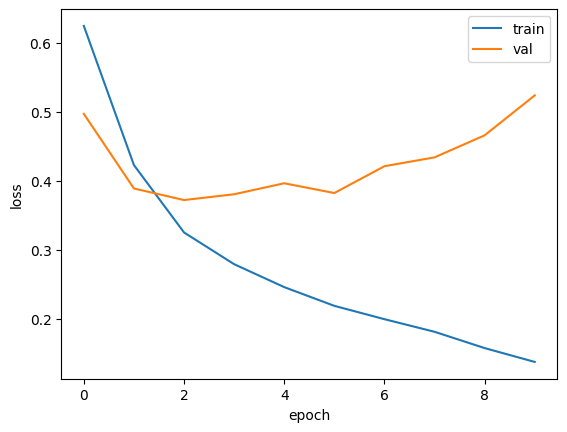

In [10]:
# Visualize the loss in fitting process
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

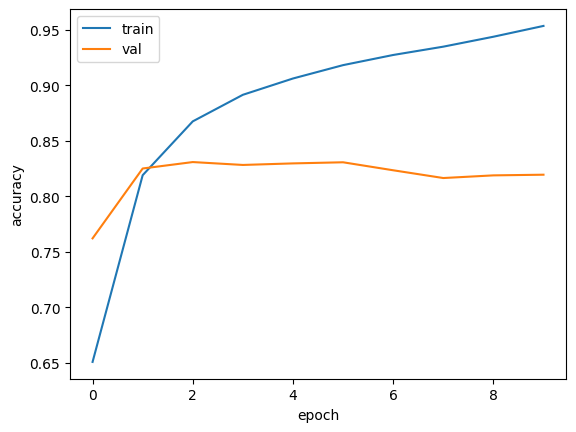

In [11]:
# Visualize the accuracy in fitting process
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('Test Accuracy:', test_acc)

782/782 [==============================] - 5s 7ms/step - loss: 0.5277 - accuracy: 0.8170
Test Accuracy: 0.8169599771499634
